In [16]:
import math
import torch
import gpytorch
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np

In [2]:
kern1 = gpytorch.kernels.RBFKernel()
kern2 = gpytorch.kernels.RBFKernel()

In [3]:
def get_spect_dens(omg, ell):
    pre = (2 * math.pi * ell**2)**(0.5)
    post = torch.exp(-2 * (math.pi**2) * (ell**2) * omg.pow(2))
    
    return pre*post

In [36]:
xx = torch.linspace(0, 10, 200)
omg = torch.linspace(0, 2, 200)
ls1 = 1.
ls2 = 4.

kern1._set_lengthscale(ls1)
kern2._set_lengthscale(ls2)

In [37]:
dens1 = get_spect_dens(omg, ls1)
dens2 = get_spect_dens(omg, ls2)

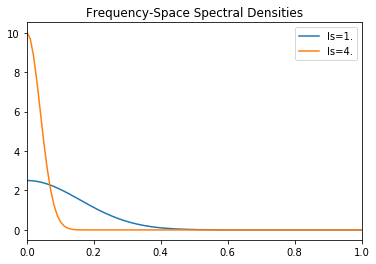

In [38]:
plt.plot(omg, dens1.detach(), label="ls=1.")
plt.plot(omg, dens2.detach(), label="ls=4.")
plt.xlim(0, 1)
plt.legend()
plt.title("Frequency-Space Spectral Densities")
plt.show();

In [39]:
cov1 = kern1(xx, xx).evaluate()
cov2 = kern2(xx, xx).evaluate()

In [40]:
e_val, e_vec = np.linalg.eig(cov1.detach())
idx = np.abs(e_val).argsort()[::-1]   
e_val1 = torch.FloatTensor(e_val[idx].real)
e_vec1 = torch.FloatTensor(e_vec[:,idx].real)

e_val, e_vec = np.linalg.eig(cov2.detach())
idx = np.abs(e_val).argsort()[::-1]   
e_val2 = torch.FloatTensor(e_val[idx].real)
e_vec2 = torch.FloatTensor(e_vec[:,idx].real)

In [41]:
eigen_pts = np.linspace(0, 100, 1000)
kde1 = gaussian_kde(e_val1)
eigendens1 = kde1(eigen_pts)

In [42]:
kde2 = gaussian_kde(e_val2)
eigendens2 = kde2(eigen_pts)

Text(0.5, 1.0, 'KDE of Eigenvalues for RBF Covariance Matrices')

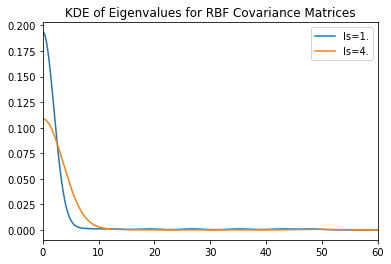

In [45]:
plt.plot(eigen_pts, eigendens1, label="ls=1.")
plt.plot(eigen_pts, eigendens2, label="ls=4.")
plt.legend()
plt.xlim(0, 60)
plt.title("KDE of Eigenvalues for RBF Covariance Matrices")

In [51]:
torch.sum(e_val1 > 1.)

tensor(10)

In [52]:
torch.sum(e_val2 > 1.)

tensor(4)